In [46]:
import cv2
import numpy as np, random
from matplotlib import pyplot as plt

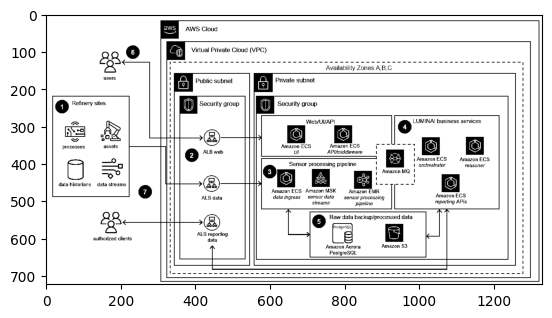

In [47]:

image_path = './test1.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
# Use Otsu's thresholding to automatically determine a good threshold
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary, cmap='gray')

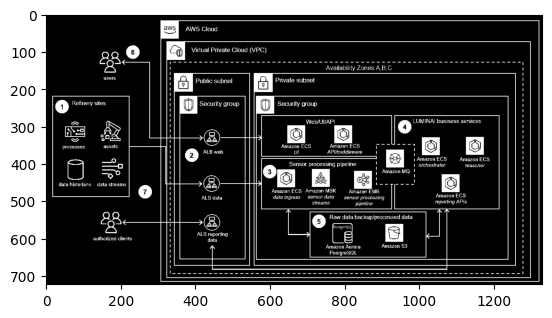

In [48]:
# kernel = np.ones((3, 3), np.uint8)
# opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
# plt.figure()
# plt.imshow(opening, cmap='gray')
# sure_bg = cv2.dilate(opening, kernel, iterations=3)
sure_bg = ~binary
plt.figure()
plt.imshow(sure_bg, cmap='gray')

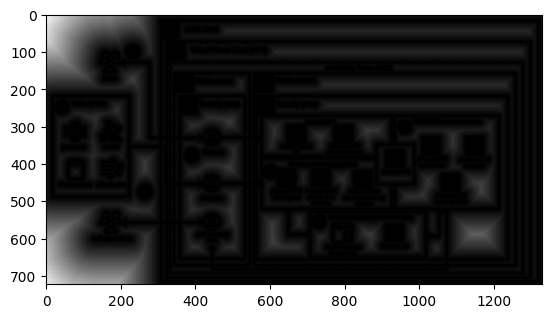

In [50]:
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray')

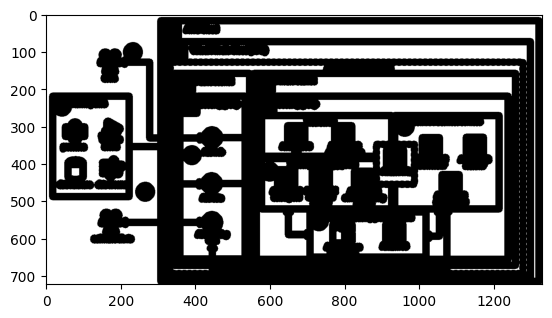

In [43]:

    
# Step 7: Threshold the distance transform to get sure foreground (regions far away from the boundary)
_, sure_fg = cv2.threshold(dist_transform, 0.05 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, cmap='gray')

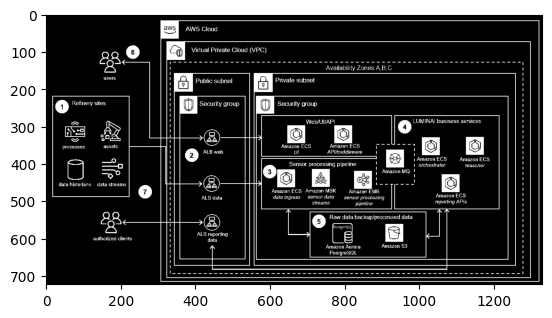

In [36]:
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

COnnected components

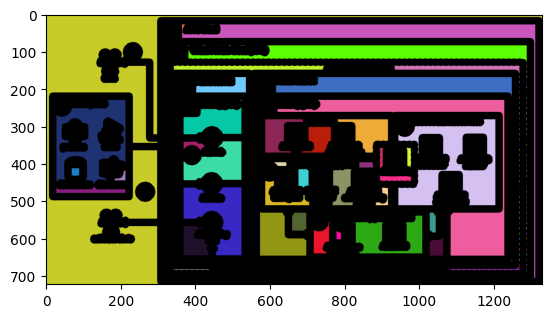

In [44]:
num_labels, markers = cv2.connectedComponents(sure_fg)
connected_components_display = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):  # Skip background label 0
    random_color = [random.randint(0, 255) for _ in range(3)]
    connected_components_display[markers == label] = random_color
plt.imshow(connected_components_display, cmap='gray')